<a href="https://colab.research.google.com/github/Anubhav0987/Project/blob/master/bankfraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Base.csv to Base.csv


In [ ]:
import pandas as pd
df = pd.read_csv('Base.csv')
df.head()


,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,0,1500.0,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,...,0,200.0,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,...,0,200.0,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,...,0,200.0,0,INTERNET,3.743048,other,0,1,0,0


In [ ]:
df.isnull().sum()


,0
fraud_bool,0
income,0
name_email_similarity,0
prev_address_months_count,0
current_address_months_count,0
customer_age,0
days_since_request,0
intended_balcon_amount,0
payment_type,0
zip_count_4w,0


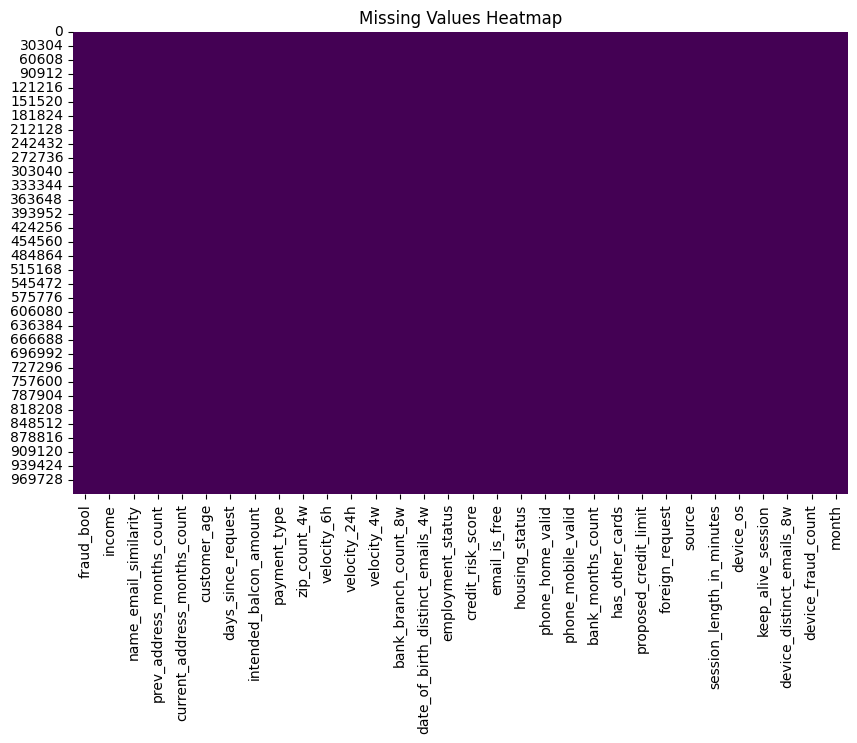

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


Shape of the DataFrame: (1000000, 32)

Data Types and Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                      

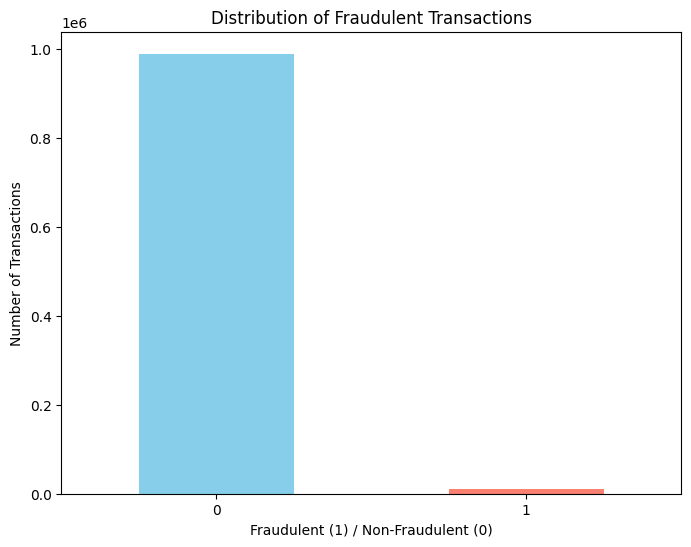

In [ ]:
import matplotlib.pyplot as plt

# Analyze the shape of the DataFrame
print(f"Shape of the DataFrame: {df.shape}")

# Examine data types and missing values
print("\nData Types and Missing Values:")
print(df.info())

# Analyze the distribution of the target variable
fraud_counts = df['fraud_bool'].value_counts()
print("\nDistribution of the target variable:")
print(fraud_counts)

# Calculate and report the class imbalance ratio
imbalance_ratio = fraud_counts.iloc[0] / fraud_counts.iloc[1]
print(f"\nClass Imbalance Ratio (Majority/Minority): {imbalance_ratio}")

# Visualize the class distribution
plt.figure(figsize=(8, 6))
fraud_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Fraudulent Transactions')
plt.xlabel('Fraudulent (1) / Non-Fraudulent (0)')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)
plt.show()

In [ ]:
for col in ['fraud_bool', 'income', 'customer_age', 'days_since_request', 'intended_balcon_amount',
            'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w', 'bank_branch_count_8w',
            'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'bank_months_count',
            'proposed_credit_limit', 'foreign_request', 'session_length_in_minutes',
            'device_distinct_emails_8w', 'device_fraud_count', 'month', 'prev_address_months_count', 'current_address_months_count']:
    try:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    except:
        print(f"Error converting column {col} to numeric.")

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Verify data quality after cleaning
print(df.info())

# Check for unusual values
for col in ['fraud_bool', 'income', 'customer_age', 'days_since_request', 'intended_balcon_amount',
            'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w', 'bank_branch_count_8w',
            'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'bank_months_count',
            'proposed_credit_limit', 'foreign_request', 'session_length_in_minutes',
            'device_distinct_emails_8w', 'device_fraud_count', 'month']:
    print(f"Descriptive statistics for {col}:\n{df[col].describe()}\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

In [ ]:
import pandas as pd
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# Make sure df is defined before use.
# In this notebook's structure, df is loaded in a previous cell.
# If running this cell alone, you would need to load df here:
df = pd.read_csv('Base.csv')
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Remove the target variable from numerical features
# Ensure 'fraud_bool' is actually in the numerical_cols before attempting to remove
if 'fraud_bool' in numerical_cols:
    numerical_cols.remove('fraud_bool')
# Also check if it might be in categorical, though less likely for a boolean
elif 'fraud_bool' in categorical_cols:
     categorical_cols.remove('fraud_bool')


# Scale numerical features using RobustScaler
scaler = RobustScaler()
# Ensure there are numerical columns to scale
if numerical_cols:
    df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
else:
    print("Warning: No numerical columns found to scale.")


# Encode categorical features using OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
# Ensure there are categorical columns to encode
if categorical_cols:
    encoded_features = encoder.fit_transform(df[categorical_cols])
    encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_cols))
else:

    encoded_df = pd.DataFrame(index=df.index)
X = pd.concat([df[numerical_cols].reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

if 'fraud_bool' in df.columns:
    y = df['fraud_bool']
else:
    raise KeyError("Target column 'fraud_bool' not found in the DataFrame.")


# Check for and impute missing values (if any) using mean imputation
imputer = SimpleImputer(strategy='mean')  # Using mean imputation
# Need to reindex X before imputation if previous operations changed the index
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

In [ ]:
target_col = 'fraud_bool'  # Replace with the actual name
X = df.drop(columns=[target_col])
y = df[target_col]


In [ ]:
print(df['fraud_bool'].value_counts())


fraud_bool
0    988971
1     11029
Name: count, dtype: int64


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Base.csv')

# Print column names and number of unique values in each column
print("Column Names:\n", df.columns)
print("\nUnique Values per Column:\n", df.nunique())


Column Names:
 Index(['fraud_bool', 'income', 'name_email_similarity',
       'prev_address_months_count', 'current_address_months_count',
       'customer_age', 'days_since_request', 'intended_balcon_amount',
       'payment_type', 'zip_count_4w', 'velocity_6h', 'velocity_24h',
       'velocity_4w', 'bank_branch_count_8w',
       'date_of_birth_distinct_emails_4w', 'employment_status',
       'credit_risk_score', 'email_is_free', 'housing_status',
       'phone_home_valid', 'phone_mobile_valid', 'bank_months_count',
       'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'source',
       'session_length_in_minutes', 'device_os', 'keep_alive_session',
       'device_distinct_emails_8w', 'device_fraud_count', 'month'],
      dtype='object')

Unique Values per Column:
 fraud_bool                               2
income                                   9
name_email_similarity               998861
prev_address_months_count              374
current_address_months_count        

In [ ]:
import pandas as pd

# Step 1: Load your dataset
df = pd.read_csv('Base.csv')

# Step 2: Identify categorical columns (object or category dtype)
cat_cols = df.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns:\n", cat_cols)

# Step 3: Apply One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Step 4: View result
print("\nEncoded Dataset Shape:", df_encoded.shape)
print("\nFirst 5 Rows of Encoded Data:\n", df_encoded.head())


Categorical Columns:
 Index(['payment_type', 'employment_status', 'housing_status', 'source',
       'device_os'],
      dtype='object')

Encoded Dataset Shape: (1000000, 48)

First 5 Rows of Encoded Data:
    fraud_bool  income  name_email_similarity  prev_address_months_count  \
0           0     0.3               0.986506                         -1   
1           0     0.8               0.617426                         -1   
2           0     0.8               0.996707                          9   
3           0     0.6               0.475100                         11   
4           0     0.9               0.842307                         -1   

   current_address_months_count  customer_age  days_since_request  \
0                            25            40            0.006735   
1                            89            20            0.010095   
2                            14            40            0.012316   
3                            14            30            0.006991 

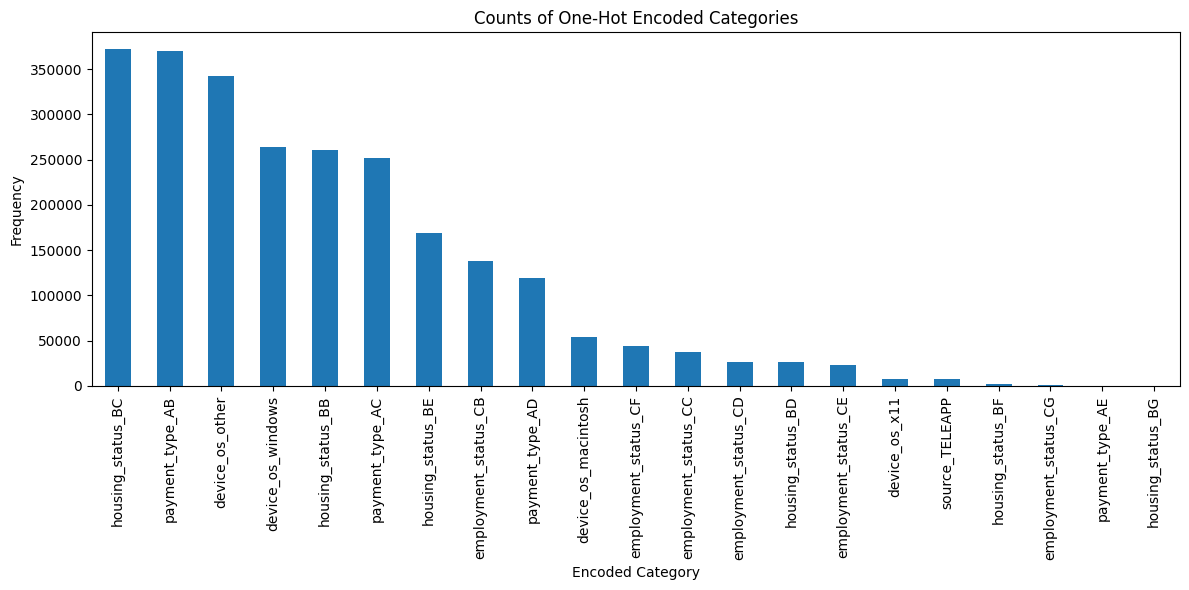

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load dataset
df = pd.read_csv('Base.csv')

# Step 2: Identify categorical columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns

# Step 3: One-Hot Encode categorical columns
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Step 4: Plot counts of one-hot encoded columns
encoded_cols = [col for col in df_encoded.columns if any(original_col in col for original_col in cat_cols)]

# Sum all 1s in each one-hot encoded column to get counts
one_hot_counts = df_encoded[encoded_cols].sum().sort_values(ascending=False)

# Step 5: Plot
plt.figure(figsize=(12, 6))
one_hot_counts.plot(kind='bar')
plt.title('Counts of One-Hot Encoded Categories')
plt.ylabel('Frequency')
plt.xlabel('Encoded Category')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


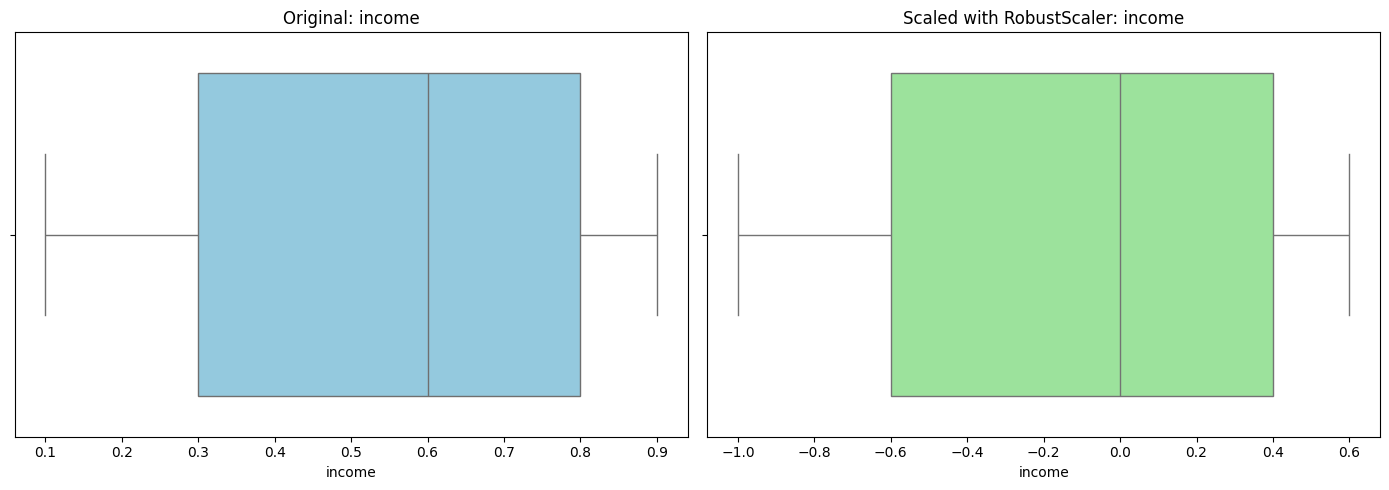

In [ ]:
import pandas as pd
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load your uploaded CSV file
df = pd.read_csv('Base.csv')  # Ensure this name matches the uploaded file

# Identify numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Optional: Remove the target column if it exists (replace 'Class' if different)
target_col = 'fraud_bool'
if target_col in num_cols:
    num_cols = num_cols.drop(target_col)

# Apply RobustScaler
scaler = RobustScaler()
df_scaled = df.copy()
df_scaled[num_cols] = scaler.fit_transform(df[num_cols])

# Plot original vs scaled boxplot for the first numeric column
col = num_cols[0]

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=df[col], color='skyblue')
plt.title(f'Original: {col}')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_scaled[col], color='lightgreen')
plt.title(f'Scaled with RobustScaler: {col}')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Step 1: Load your dataset
df = pd.read_csv('Base.csv')

# Step 2: Define your target column (replace if different)
target_col = 'fraud_bool'
X = df.drop(columns=[target_col])
y = df[target_col]

# Step 3: First split: Train (70%) vs Temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=42)

# Step 4: Second split: Validation (15%) vs Test (15%) from Temp
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=42)

# Step 5: Print the shapes and class distributions
print("Train set:", X_train.shape, "| Fraud %:", round(y_train.mean() * 100, 4))
print("Validation set:", X_val.shape, "| Fraud %:", round(y_val.mean() * 100, 4))
print("Test set:", X_test.shape, "| Fraud %:", round(y_test.mean() * 100, 4))


Train set: (700000, 31) | Fraud %: 1.1029
Validation set: (150000, 31) | Fraud %: 1.1033
Test set: (150000, 31) | Fraud %: 1.1027



--- SMOTE ---

--- ADASYN ---

--- RandomOverSampler ---


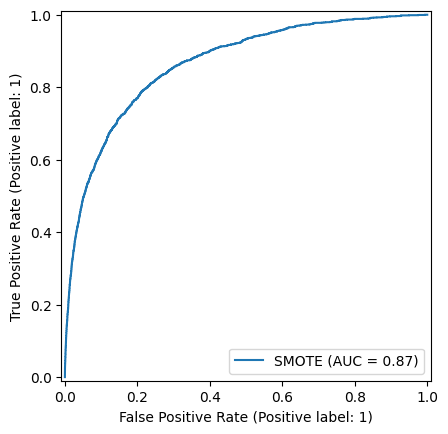

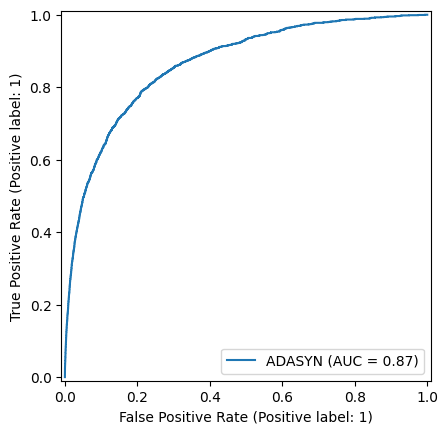

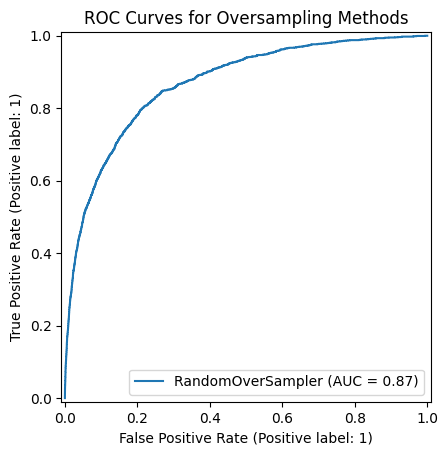


Comparison Table:

              Method  Precision    Recall  F1-Score   AUC-ROC
0              SMOTE   0.045027  0.743807  0.084914  0.865203
1             ADASYN   0.043919  0.748640  0.082971  0.865068
2  RandomOverSampler   0.042348  0.778852  0.080329  0.867790


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, RocCurveDisplay
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
import matplotlib.pyplot as plt

# Step 1: Load the dataset
df = pd.read_csv('Base.csv')

# Step 2: Separate target and features
target_col = 'fraud_bool'  # change if needed
X = df.drop(columns=[target_col])
y = df[target_col]

# Step 3: One-hot encode categorical columns
X = pd.get_dummies(X, drop_first=True)

# Step 4: Train-Validation-Test Split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=42)

# Step 5: Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Step 6: Oversamplers
oversamplers = {
    'SMOTE': SMOTE(random_state=42),
    'ADASYN': ADASYN(random_state=42),
    'RandomOverSampler': RandomOverSampler(random_state=42)
}

# Step 7: Train & evaluate
results = []

for name, sampler in oversamplers.items():
    print(f"\n--- {name} ---")

    # Oversample
    X_resampled, y_resampled = sampler.fit_resample(X_train_scaled, y_train)

    # Train model
    model = LogisticRegression(solver='liblinear', random_state=42)
    model.fit(X_resampled, y_resampled)

    # Predict on validation set
    y_pred = model.predict(X_val_scaled)
    y_proba = model.predict_proba(X_val_scaled)[:, 1]

    # Evaluate
    report = classification_report(y_val, y_pred, output_dict=True)
    auc = roc_auc_score(y_val, y_proba)

    results.append({
        'Method': name,
        'Precision': report['1']['precision'],
        'Recall': report['1']['recall'],
        'F1-Score': report['1']['f1-score'],
        'AUC-ROC': auc
    })

    # Plot ROC
    RocCurveDisplay.from_predictions(y_val, y_proba, name=name)

plt.title("ROC Curves for Oversampling Methods")
plt.show()

# Final comparison table
results_df = pd.DataFrame(results)
print("\nComparison Table:\n")
print(results_df.sort_values(by='F1-Score', ascending=False))


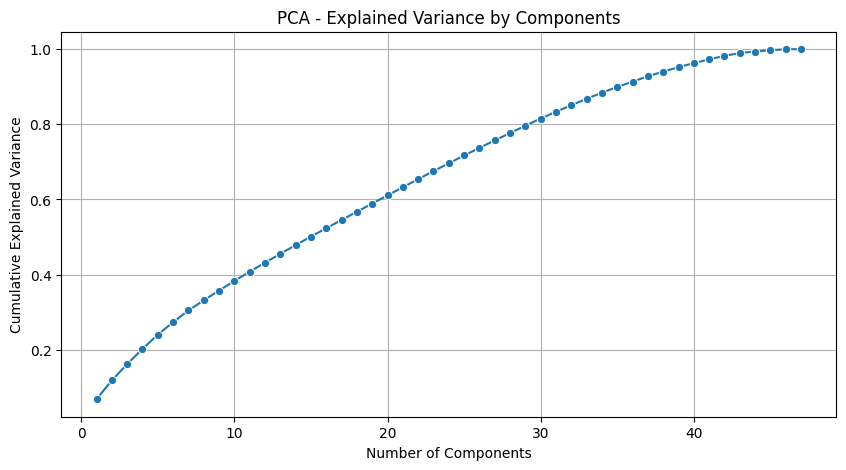

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load your dataset
df = pd.read_csv('Base.csv')

# Step 2: Separate target and features
target_col = 'fraud_bool'  # Replace with your target column name if different
X = df.drop(columns=[target_col])
y = df[target_col]

# Step 3: One-Hot Encode categorical columns
X = pd.get_dummies(X, drop_first=True)

# Step 4: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Step 6: Explained variance plot
plt.figure(figsize=(10, 5))
sns.lineplot(x=range(1, len(pca.explained_variance_ratio_)+1), y=pca.explained_variance_ratio_.cumsum(), marker="o")
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Explained Variance by Components')
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load your dataset
df = pd.read_csv("Base.csv")

# Re-apply previous data processing steps to ensure consistency
# Identify numerical and categorical features
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Remove the target variable 'fraud_bool' from numerical features if it's still there
if 'fraud_bool' in numerical_cols:
    numerical_cols.remove('fraud_bool')

# Assuming 'month' is the target for the task being attempted in this cell, remove it from potential features
if 'month' in numerical_cols:
    numerical_cols.remove('month')
if 'month' in categorical_cols:
    categorical_cols.remove('month')


# Scale numerical features using RobustScaler (as done previously in the notebook)
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

scaler_robust = RobustScaler()
df[numerical_cols] = scaler_robust.fit_transform(df[numerical_cols])

# Encode categorical features using OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
# Check if there are any categorical columns to encode
if categorical_cols:
    encoded_features = encoder.fit_transform(df[categorical_cols])
    encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_cols))
else:
    # If no categorical columns, create an empty DataFrame
    encoded_df = pd.DataFrame()


# Combine scaled numerical and encoded categorical features
# Ensure that the index is aligned before concatenation if needed, but concat by column axis should handle this.
# Let's rebuild X based on the processed numerical and encoded categorical parts
X = pd.concat([df[numerical_cols], encoded_df], axis=1)

# Separate features (X) and target (y) based on the cell's logic where 'month' is the target
# Ensure 'month' is treated as the target and not included in X
y = df['month']
# Convert target to numeric if it's not already, handling potential non-numeric values if they exist
y = pd.to_numeric(y, errors='coerce')
# Drop rows where target is NaN after coercion if any non-numeric values were present
if y.isnull().any():
    print("Warning: Non-numeric values found in target 'month'. Dropping corresponding rows.")
    non_numeric_indices = y[y.isnull()].index
    X = X.drop(non_numeric_indices)
    y = y.drop(non_numeric_indices)


# Check for and impute missing values (if any) using mean imputation (as done previously)
imputer = SimpleImputer(strategy='mean')
# Apply imputer to X
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

numerical_cols_for_scaling = X.select_dtypes(include=['number']).columns.tolist()
X_numerical_only = X[numerical_cols_for_scaling]

# Normalize numerical features using StandardScaler (as intended by the original failing cell)
# Ensure X_numerical_only is not empty
if not X_numerical_only.empty:
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_numerical_only)
    # Replace the numerical columns in X with the scaled versions
    X[numerical_cols_for_scaling] = X_scaled
else:
    print("Warning: No numerical columns found in X to scale.")
    X_scaled = X # If no numerical columns, X remains as is (likely only encoded categoricals)


# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

print("Data successfully loaded, processed, and split.")
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Data successfully loaded, processed, and split.
Shape of X_train: (800000, 51)
Shape of y_train: (800000,)
Shape of X_test: (200000, 51)
Shape of y_test: (200000,)


In [ ]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif

# Dimensionality reduction
pca = PCA(n_components=10)  # Use based on variance retained
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# OR feature selection
selector = SelectKBest(score_func=f_classif, k=20)
X_train_fs = selector.fit_transform(X_train, y_train)
X_test_fs = selector.transform(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [24] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [ ]:
import pandas as pd
from imblearn.over_sampling import ADASYN
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Step 1: Load dataset
df = pd.read_csv('Base.csv')

# Step 2: Define target and features
target_col = 'fraud_bool'  # Replace if your target column is named differently
X = df.drop(columns=[target_col])
y = df[target_col]

# Step 3: One-hot encode categorical features (if any)
X = pd.get_dummies(X, drop_first=True)

# Step 4: Split into training and testing (or validation)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42)

# Step 5: Scale the features (optional but recommended)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Step 6: Apply ADASYN oversampling
adasyn = ADASYN(random_state=42)
X_adasyn, y_adasyn = adasyn.fit_resample(X_train_scaled, y_train)

# Step 7: Check class balance after ADASYN
print("Original class distribution:\n", y_train.value_counts())
print("\nAfter ADASYN oversampling:\n", pd.Series(y_adasyn).value_counts())


Original class distribution:
 fraud_bool
0    692280
1      7720
Name: count, dtype: int64

After ADASYN oversampling:
 fraud_bool
0    692280
1    691416
Name: count, dtype: int64



Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.82      0.90    296691
           1       0.05      0.77      0.09      3309

    accuracy                           0.82    300000
   macro avg       0.52      0.80      0.49    300000
weighted avg       0.99      0.82      0.89    300000

Precision:  0.0454
Recall:     0.7743
F1-Score:   0.0858
ROC-AUC:    0.8734


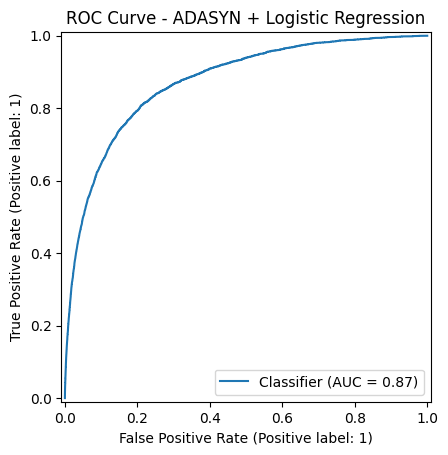

In [ ]:
import pandas as pd
from imblearn.over_sampling import ADASYN
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report, precision_score,
    recall_score, f1_score, roc_auc_score,
    roc_curve, RocCurveDisplay
)
import matplotlib.pyplot as plt

# Step 1: Load dataset
df = pd.read_csv('Base.csv')
target_col = 'fraud_bool'  # Replace if your target column is different

# Step 2: Separate features and target
X = df.drop(columns=[target_col])
y = df[target_col]

# Step 3: One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Step 4: Train-Test Split (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=42
)

# Step 5: Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Apply ADASYN
adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X_train_scaled, y_train)

# Step 7: Train Logistic Regression model
model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_resampled, y_resampled)

# Step 8: Make predictions on test set
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

# Step 9: Compute metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

# Print classification report and individual metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print(f"Precision:  {precision:.4f}")
print(f"Recall:     {recall:.4f}")
print(f"F1-Score:   {f1:.4f}")
print(f"ROC-AUC:    {roc_auc:.4f}")

# Step 10: Plot ROC Curve
RocCurveDisplay.from_predictions(y_test, y_proba)
plt.title("ROC Curve - ADASYN + Logistic Regression")
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    precision_score, recall_score, f1_score, roc_auc_score,
    classification_report, RocCurveDisplay
)
from imblearn.over_sampling import BorderlineSMOTE
import matplotlib.pyplot as plt

# Step 1: Load dataset
df = pd.read_csv('Base.csv')
target_col = 'fraud_bool'  # Replace if different

# Step 2: Separate features and target
X = df.drop(columns=[target_col])
y = df[target_col]

# Step 3: One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Step 4: Train-test split (with stratify for class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42)

# Step 5: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Apply Borderline-SMOTE
bsmote = BorderlineSMOTE(random_state=42, kind='borderline-1')
X_resampled, y_resampled = bsmote.fit_resample(X_train_scaled, y_train)

# Step 7: Train a Logistic Regression model
model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_resampled, y_resampled)

# Step 8: Predict on test set
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

# Step 9: Compute metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

# Step 10: Print results
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1-Score  : {f1:.4f}")
print(f"ROC-AUC   : {roc_auc:.4f}")





Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.90      0.95    296691
           1       0.07      0.65      0.12      3309

    accuracy                           0.90    300000
   macro avg       0.53      0.77      0.53    300000
weighted avg       0.99      0.90      0.94    300000

Precision : 0.0672
Recall    : 0.6476
F1-Score  : 0.1217
ROC-AUC   : 0.8736


In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [ ]:
# Load your dataset
df = pd.read_csv('Base.csv')
target_col = 'fraud_bool'  # change if needed

# Separate features and target
X = df.drop(columns=[target_col])
y = df[target_col]

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)


In [ ]:
# Extract minority class (fraud) for training GAN
X_minority = X_train_scaled[y_train.values == 1]
X_minority = torch.tensor(X_minority, dtype=torch.float32)
input_dim = X_minority.shape[1]


In [ ]:
# Generator
class Generator(nn.Module):
    def __init__(self, input_dim, hidden_dim=64):
        super(Generator, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(20, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, input_dim)
        )

    def forward(self, z):
        return self.net(z)

# Discriminator
class Discriminator(nn.Module):
    def __init__(self, input_dim, hidden_dim=64):
        super(Discriminator, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.net(x)


In [ ]:
# Initialize models
G = Generator(input_dim)
D = Discriminator(input_dim)

criterion = nn.BCELoss()
optimizer_G = optim.Adam(G.parameters(), lr=0.001)
optimizer_D = optim.Adam(D.parameters(), lr=0.001)

epochs = 1000
batch_size = 64

for epoch in range(epochs):
    idx = torch.randint(0, X_minority.size(0), (batch_size,))
    real_samples = X_minority[idx]
    z = torch.randn(batch_size, 20)
    fake_samples = G(z)

    # Discriminator
    real_labels = torch.ones(batch_size, 1)
    fake_labels = torch.zeros(batch_size, 1)

    D_real = D(real_samples)
    D_fake = D(fake_samples.detach())

    loss_D = criterion(D_real, real_labels) + criterion(D_fake, fake_labels)
    optimizer_D.zero_grad()
    loss_D.backward()
    optimizer_D.step()

    # Generator
    D_fake = D(fake_samples)
    loss_G = criterion(D_fake, real_labels)
    optimizer_G.zero_grad()
    loss_G.backward()
    optimizer_G.step()

    if epoch % 200 == 0:
        print(f"Epoch {epoch}: Loss_D={loss_D.item():.4f}, Loss_G={loss_G.item():.4f}")


Epoch 0: Loss_D=1.3299, Loss_G=0.6872
Epoch 200: Loss_D=0.6553, Loss_G=1.3176
Epoch 400: Loss_D=0.5360, Loss_G=1.5353
Epoch 600: Loss_D=0.7058, Loss_G=1.2249
Epoch 800: Loss_D=0.6756, Loss_G=2.1970


In [ ]:
# Generate 2000 synthetic fraud samples
n_samples = 2000
z = torch.randn(n_samples, 20)
synthetic_fraud = G(z).detach().numpy()

# Create new training dataset
X_train_synthetic = np.vstack((X_train_scaled, synthetic_fraud))
y_train_synthetic = np.hstack((y_train, np.ones(n_samples)))

print("New training data shape:", X_train_synthetic.shape)


New training data shape: (702000, 47)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    RocCurveDisplay
)

# Train a logistic regression model on the GAN-augmented data
model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_train_synthetic, y_train_synthetic)


LogisticRegression(random_state=42, solver='liblinear')

In [ ]:
# Scale the original test set (already done earlier)
X_test_scaled = scaler.transform(X_test)

# Make predictions
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for ROC

# Compute metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

# Print classification metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1-Score  : {f1:.4f}")
print(f"ROC-AUC   : {roc_auc:.4f}")



Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99    296691
           1       0.64      0.01      0.02      3309

    accuracy                           0.99    300000
   macro avg       0.81      0.51      0.51    300000
weighted avg       0.99      0.99      0.98    300000

Precision : 0.6379
Recall    : 0.0112
F1-Score  : 0.0220
ROC-AUC   : 0.8753


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Split features/target
X = df.drop(columns=['fraud_bool'])
y = df['fraud_bool']

# One-hot encode + scale
X = pd.get_dummies(X, drop_first=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

print(f"Class distribution after SMOTE:\n{pd.Series(y_resampled).value_counts()}")


Class distribution after SMOTE:
fraud_bool
0    988971
1    988971
Name: count, dtype: int64


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import matthews_corrcoef

X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.3, stratify=y_resampled, random_state=42)

mcc_scores = []
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)

for col in X.columns:
    model = LogisticRegression(solver='liblinear')
    model.fit(X_train[:, [X.columns.get_loc(col)]], y_train)
    y_pred = model.predict(X_val[:, [X.columns.get_loc(col)]])
    score = matthews_corrcoef(y_val, y_pred)
    mcc_scores.append(score)

# Show results
mcc_df = pd.DataFrame({
    'Feature': X.columns,
    'MCC_Score': mcc_scores
}).sort_values(by='MCC_Score', ascending=False)

print("\nTop Features by MCC (after SMOTE):")
print(mcc_df.head(10))



Top Features by MCC (after SMOTE):
                      Feature  MCC_Score
45          device_os_windows   0.361213
13          credit_risk_score   0.271699
2   prev_address_months_count   0.266160
19      proposed_credit_limit   0.250825
22         keep_alive_session   0.248483
0                      income   0.237377
4                customer_age   0.213965
1       name_email_similarity   0.190740
18            has_other_cards   0.190002
39          housing_status_BE   0.185667


In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score

# Load dataset
df = pd.read_csv("Base.csv")

# Replace with your actual target column
target_col = "fraud_bool" if "fraud_bool" in df.columns else df.columns[-1]

# Drop non-numeric columns if any
df = df.select_dtypes(include=[np.number])

# Separate features and labels
X = df.drop(columns=[target_col])
y = df[target_col]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape input to 3D for LSTM: (samples, sequence_length, features)
# We'll use sequence_length = 1 (treat each row as one time step)
X_lstm = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Convert to tensors
X_tensor = torch.tensor(X_lstm, dtype=torch.float32)
y_tensor = torch.tensor(y.values, dtype=torch.float32)

# Create dataset
dataset = TensorDataset(X_tensor, y_tensor)

# Split into train and test sets
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_ds, val_ds = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_ds, batch_size=64, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=64)


In [ ]:
class FraudLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers=1):
        super(FraudLSTM, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        out = lstm_out[:, -1, :]
        out = self.fc(out)
        return self.sigmoid(out)


In [ ]:
input_size = X_tensor.shape[2]
model = FraudLSTM(input_size=input_size, hidden_size=64)
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 10
for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    for X_batch, y_batch in train_loader:
        y_batch = y_batch.view(-1, 1)
        preds = model(X_batch)
        loss = criterion(preds, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    print(f"Epoch {epoch+1}/{epochs} - Loss: {epoch_loss:.4f}")


Epoch 1/10 - Loss: 682.8073
Epoch 2/10 - Loss: 607.6749
Epoch 3/10 - Loss: 600.3478
Epoch 4/10 - Loss: 596.2153
Epoch 5/10 - Loss: 591.9400
Epoch 6/10 - Loss: 588.5507
Epoch 7/10 - Loss: 585.6646
Epoch 8/10 - Loss: 582.3155
Epoch 9/10 - Loss: 580.0166
Epoch 10/10 - Loss: 577.4242


In [ ]:
model.eval()
all_preds = []
all_targets = []

with torch.no_grad():
    for X_batch, y_batch in val_loader:
        preds = model(X_batch)
        all_preds.extend(preds.view(-1).numpy())
        all_targets.extend(y_batch.numpy())

all_preds = np.array(all_preds) > 0.5
print("\nClassification Report:")
print(classification_report(all_targets, all_preds))

auc = roc_auc_score(all_targets, all_preds)
print(f"ROC-AUC Score: {auc:.4f}")



Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99    197747
         1.0       0.52      0.01      0.01      2253

    accuracy                           0.99    200000
   macro avg       0.75      0.50      0.50    200000
weighted avg       0.98      0.99      0.98    200000

ROC-AUC Score: 0.5029


In [ ]:
!pip install deslib scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.6/172.6 kB 10.2 MB/s eta 0:00:00


In [ ]:
!pip install ctgan deslib xgboost lightgbm imbalanced-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.8/73.8 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 33.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 40.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 72.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
  

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("Base.csv")
target_col = "fraud_bool"
df = pd.get_dummies(df, drop_first=True)

X = df.drop(columns=[target_col])
y = df[target_col]

# Split before GAN training
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from ctgan import CTGAN

# Step 1: Load and preprocess
df = pd.read_csv("Base.csv")
target_col = "fraud_bool"
df = pd.get_dummies(df, drop_first=True)

X = df.drop(columns=[target_col])
y = df[target_col]

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Step 3: Prepare minority fraud class
minority_df = X_train.copy()
minority_df['fraud_bool'] = y_train
minority_df = minority_df[minority_df['fraud_bool'] == 1]

# Step 4: Train CTGAN
ctgan = CTGAN(epochs=10)
ctgan.fit(minority_df, discrete_columns=['fraud_bool'])

# Step 5: Sample synthetic fraud cases
synth_data = ctgan.sample(len(minority_df))
synth_data = synth_data[synth_data['fraud_bool'] == 1]



In [ ]:
# Combine with original training data
X_train_gan = pd.concat([X_train, synth_data.drop(columns=['fraud_bool'])])
y_train_gan = pd.concat([y_train, pd.Series([1] * len(synth_data))])


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Scaling
scaler = StandardScaler()
X_train_gan_scaled = scaler.fit_transform(X_train_gan)
X_test_scaled = scaler.transform(X_test)

# Ensemble
rf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

ensemble = VotingClassifier(estimators=[('rf', rf), ('xgb', xgb)], voting='soft')
ensemble.fit(X_train_gan_scaled, y_train_gan)

# Predict
y_pred = ensemble.predict(X_test_scaled)
y_proba = ensemble.predict_proba(X_test_scaled)[:, 1]

# Metrics
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:02:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       0.99      1.00      0.99    197794
           1       0.55      0.01      0.03      2206

    accuracy                           0.99    200000
   macro avg       0.77      0.51      0.51    200000
weighted avg       0.98      0.99      0.98    200000

ROC-AUC: 0.881899808422714


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load and encode
df = pd.read_csv("Base.csv")
df = pd.get_dummies(df, drop_first=True)
X = df.drop(columns=["fraud_bool"])
y = df["fraud_bool"]

# Split into training, validation (DSEL), and test
X_temp, X_test, y_temp, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
X_train, X_dsel, y_train, y_dsel = train_test_split(X_temp, y_temp, stratify=y_temp, test_size=0.25, random_state=42)

# Scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_dsel = scaler.transform(X_dsel)
X_test = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Fast models for DES
clf1 = LogisticRegression(solver='liblinear')
clf2 = DecisionTreeClassifier(max_depth=5)
clf3 = GaussianNB()

pool_classifiers = [clf1, clf2, clf3]

# Fit each model
for clf in pool_classifiers:
    clf.fit(X_train, y_train)


In [ ]:
from deslib.des.knora_e import KNORAE
from sklearn.metrics import classification_report, roc_auc_score

# Initialize and fit DES
knorae = KNORAE(pool_classifiers=pool_classifiers)
knorae.fit(X_dsel, y_dsel)

# Predict and evaluate
y_pred = knorae.predict(X_test)
y_proba = knorae.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.99      0.77      0.87    197794
           1       0.01      0.22      0.02      2206

    accuracy                           0.77    200000
   macro avg       0.50      0.50      0.44    200000
weighted avg       0.98      0.77      0.86    200000

ROC-AUC: 0.5279853087350392
